In [46]:
# Preparation
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import numpy as np

# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

In [112]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/Users/chenyx/Desktop/PPOL5203/Final Project/CSV_data/full_data_updated.csv'

# Use pandas to read the CSV file
data = pd.read_csv(file_path)

import pandas as pd

states_of_interest = ['Utah', 'Virginia', 'Tennessee', 'Pennsylvania', 'Colorado', 'Arizona',  'Iowa', 'California', 'Montana', 'Wyoming', 'Vermont','Massachusetts']

# Use the .isin() method to filter the DataFrame
filter_dta = data[data['State'].isin(states_of_interest)]

print(filter_dta)

                                                  Title  \
105   Polluting Industries Say the Cost of Cleaner A...   
106   In a U.S. First, a Commercial Plant Starts Pul...   
107   Gazing Into the Past and Future at Historic Ob...   
108    America’s Disaster Recovery System Is a Disaster   
109   California Governor to Sign Landmark Climate D...   
...                                                 ...   
2378      In One Rally, 12 Inaccurate Claims From Trump   
2379  Gas Prices Force Biden Into an Unlikely Embrac...   
2380               In Midwest Floods, a Threat to Crops   
2381         In Midwest Floods, a Broad Threat to Crops   
2382                      Obama’s Remarks in Des Moines   

                                                    URL  \
105   https://www.nytimes.com/2023/11/13/business/ec...   
106   https://www.nytimes.com/2023/11/09/climate/dir...   
107   https://www.nytimes.com/2023/11/07/travel/hist...   
108   https://www.nytimes.com/2023/10/28/opinion/fem...

In [113]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

additional_stopwords = ['said','say','since']

stop_words = set(stopwords.words('english') + additional_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenyx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
def preprocess_text_for_phrases(text):
    # Replace known multi-word place names and other specific phrases with single tokens
    text = text.replace('New York', 'New_York')
    text = text.replace('New Jersey', 'New_Jersey')
    text = text.replace('New Jersey, Connecticut', 'New_Jersey_Connecticut')
    text = text.replace('New York, Connecticut', 'New_York_Connecticut')
    text = text.replace('clean up', 'clean_up')
    return text

def preprocess_text(text):
    # First handle specific phrases
    text = preprocess_text_for_phrases(text)
    # Then tokenize and lowercase
    tokens = word_tokenize(text.lower())
    # Filter out non-alphabetic tokens and stopwords
    return [token for token in tokens if token.isalpha() and token not in stop_words]

# Apply preprocessing to the DataFrame
filter_dta = filter_dta.copy()
filter_dta['processed_text'] = filter_dta['Abstrace'].apply(preprocess_text)  # Corrected column name from 'Abstrace' to 'Abstract'
filter_dta['tokens_join'] = filter_dta['processed_text'].apply(' '.join)


In [115]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer to generate bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))

# List of the specific states
states = ['Utah', 'Virginia', 'Tennessee', 'Pennsylvania', 'Colorado', 'Arizona',  'Iowa', 'California', 'Montana', 'Wyoming', 'Vermont','Massachusetts']

# Dictionary to hold the bigram DataFrames for each state
bigram_dfs = {}

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert matrix to DataFrame with bi-gram columns for the current state
    bigram_dfs[state] = pd.DataFrame(state_text_bi.toarray(), columns=vectorizer.get_feature_names_out())

# Now you can access the bigram DataFrame for each state like this:
# bigram_df_alaska = bigram_dfs['California']
# This will give you the bigram DataFrame for Alaska

In [116]:
# Assuming 'filter_dta' is your DataFrame and it contains a 'State' column.

# List of the specific states
states = ['Utah', 'Virginia', 'Tennessee', 'Pennsylvania', 'Colorado', 'Arizona',  'Iowa', 'California', 'Montana', 'Wyoming', 'Vermont','Massachusetts']

# Dictionary to hold the top bigrams for each state
top_bigrams_states = {}

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert sums to get the same length for further analysis
    bi_gram_sums = np.array(state_text_bi.sum(axis=0)).flatten()
    
    # Get the feature names (bi-grams)
    bi_gram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame from the bi-gram names and their sums
    bi_gram_freq_df = pd.DataFrame({'bi_gram': bi_gram_names, 'count': bi_gram_sums})
    
    # Sort the DataFrame by count in descending order
    bi_gram_freq_df_sorted = bi_gram_freq_df.sort_values(by='count', ascending=False)
    
    # Store the top 20 bi-grams for the current state
    top_bigrams_states[state] = bi_gram_freq_df_sorted.head(15)

# Now 'top_bigrams_states' contains the top 20 bigrams for each of the five states.
# top_bigrams_states['California']

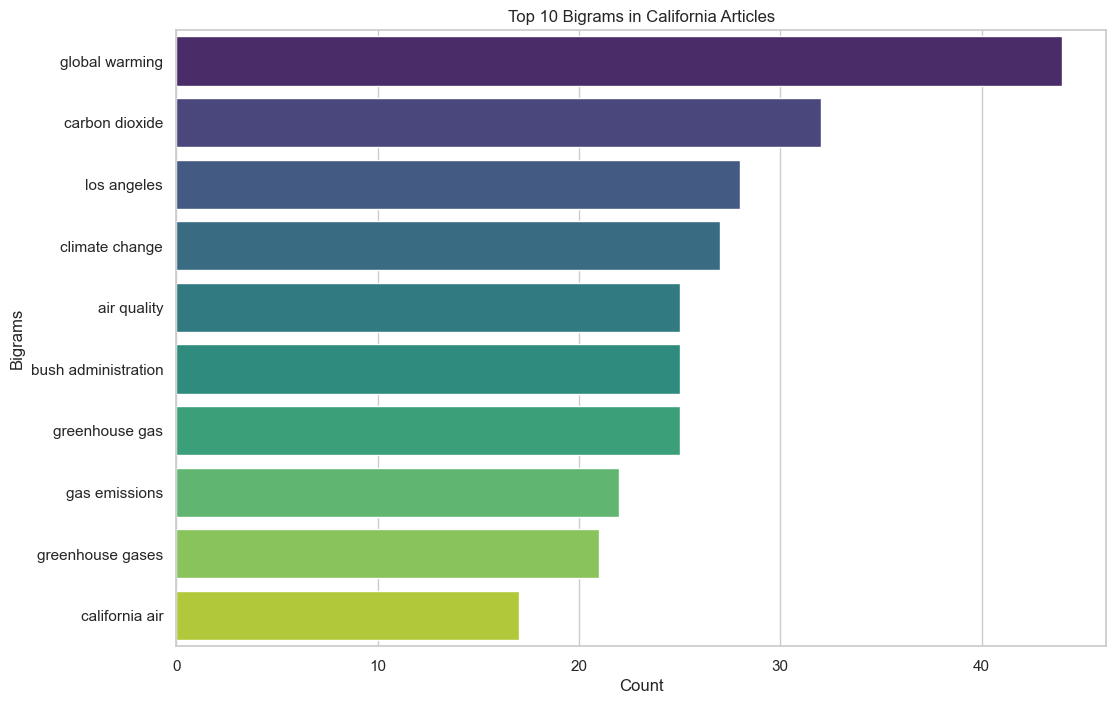

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a prettier plot
sns.set(style="whitegrid")

# Get the top 10 bigrams for California
california_top_bigrams = top_bigrams_states['California'].head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=california_top_bigrams, palette="viridis")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in California Articles')
bar_plot.set_xlabel('Count')
bar_plot.set_ylabel('Bigrams')

# Show the plot
plt.show()


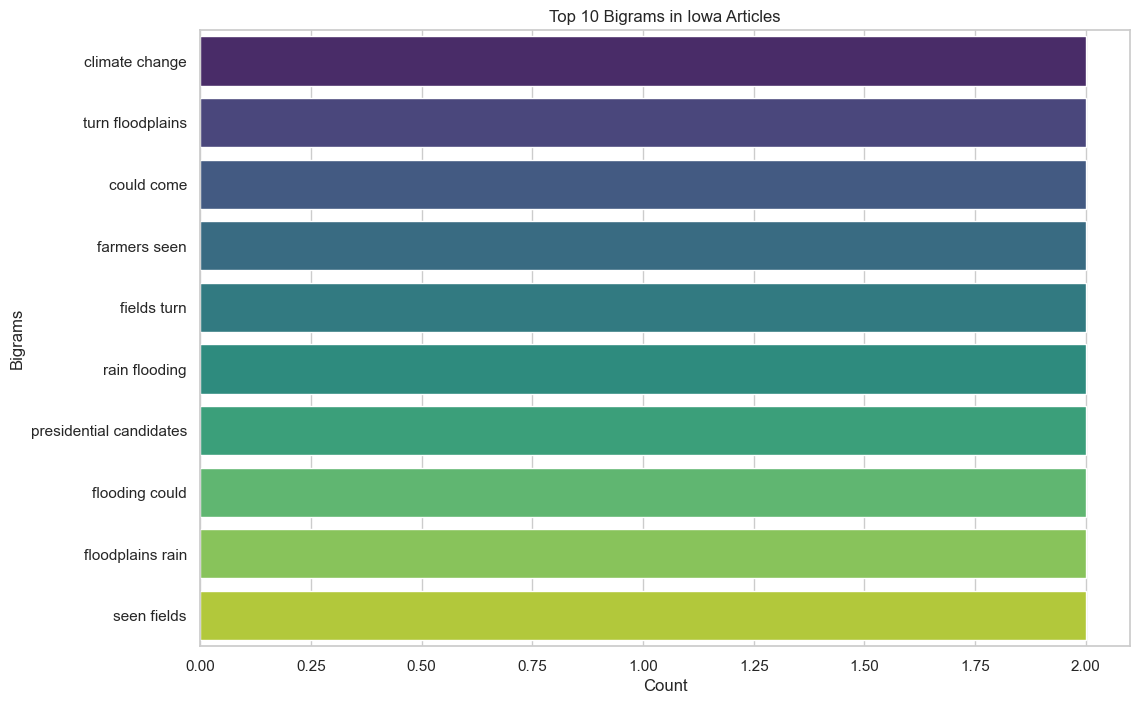

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a prettier plot
sns.set(style="whitegrid")

# Get the top 10 bigrams for California
california_top_bigrams = top_bigrams_states['Iowa'].head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=california_top_bigrams, palette="viridis")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Iowa Articles')
bar_plot.set_xlabel('Count')
bar_plot.set_ylabel('Bigrams')

# Show the plot
plt.show()


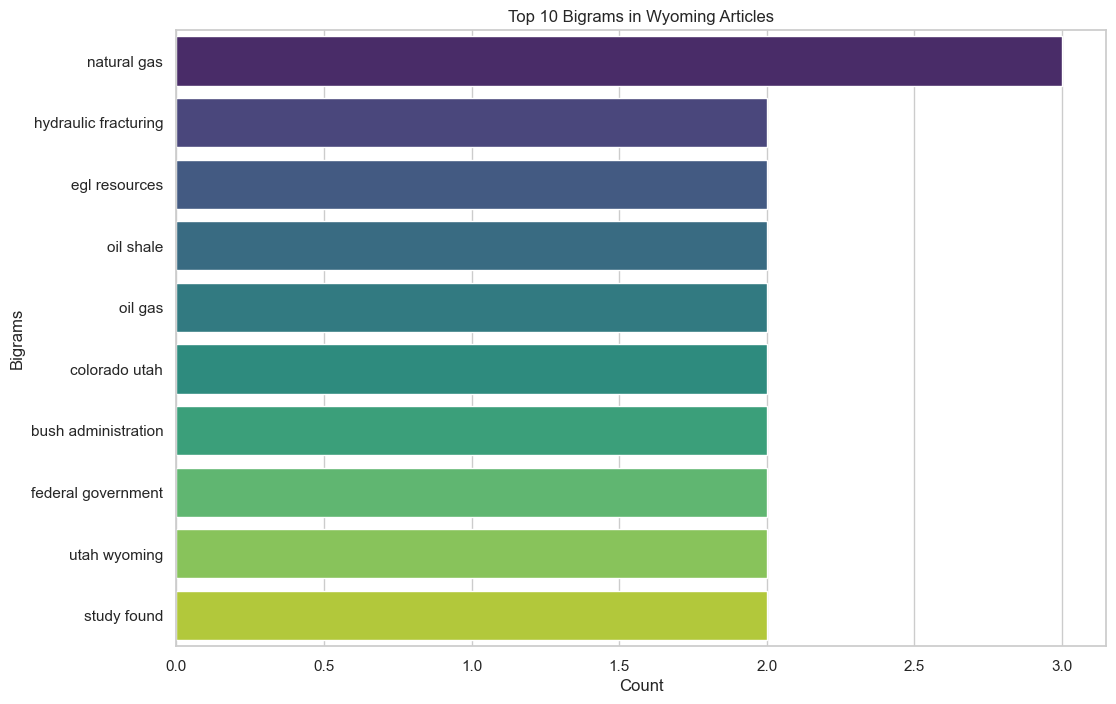

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a prettier plot
sns.set(style="whitegrid")

# Get the top 10 bigrams for California
california_top_bigrams = top_bigrams_states['Wyoming'].head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=california_top_bigrams, palette="viridis")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Wyoming Articles')
bar_plot.set_xlabel('Count')
bar_plot.set_ylabel('Bigrams')

# Show the plot
plt.show()


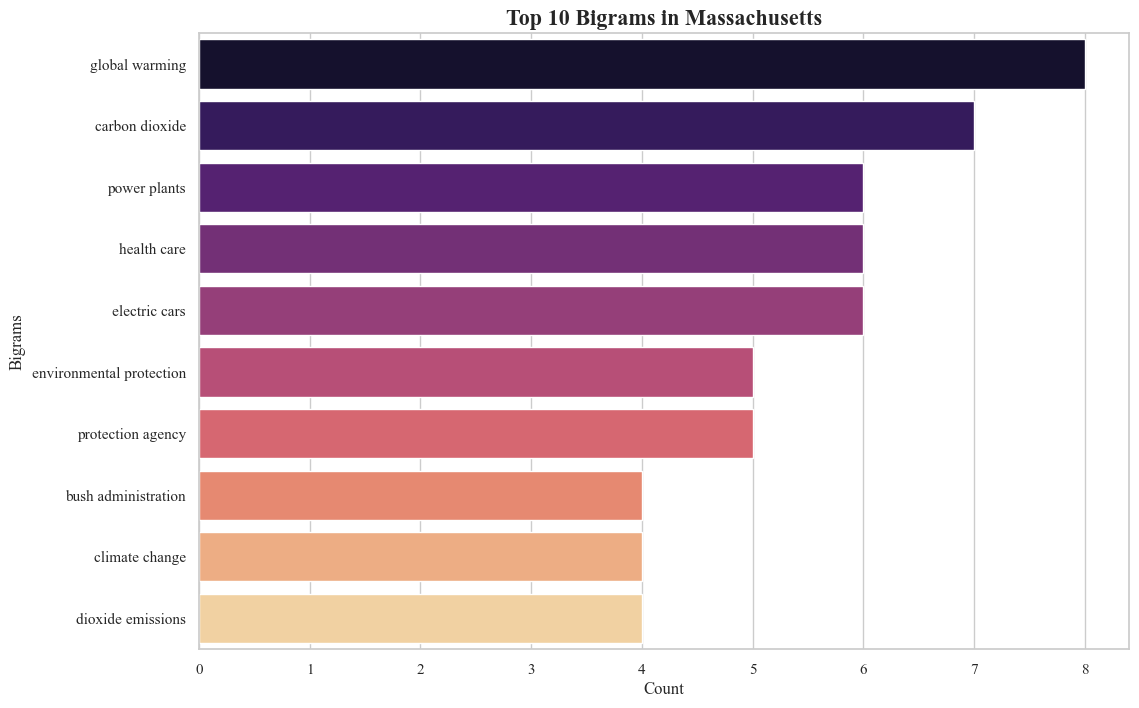

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 bigrams for Massachusetts
massachusetts_top_bigrams = top_bigrams_states['Massachusetts'].head(10)

# Set a different style for the plot
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=massachusetts_top_bigrams, palette="magma")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Massachusetts', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Show the plot
plt.show()


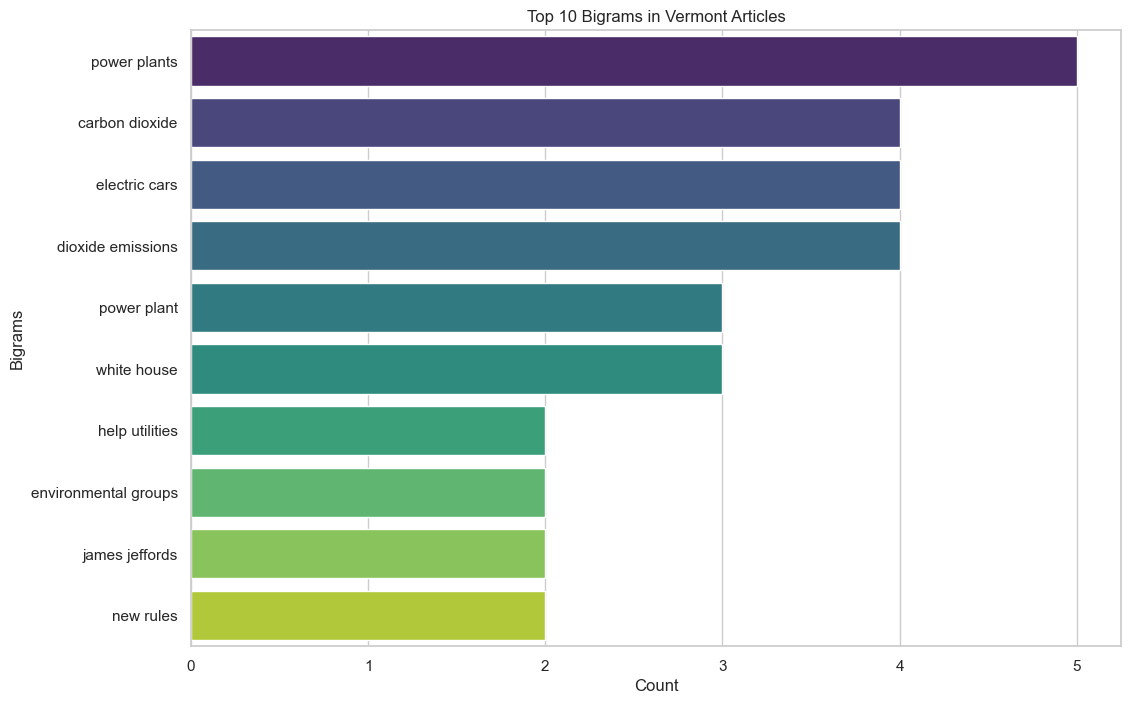

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for a prettier plot
sns.set(style="whitegrid")

# Get the top 10 bigrams for California
california_top_bigrams = top_bigrams_states['Vermont'].head(10)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=california_top_bigrams, palette="viridis")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Vermont Articles')
bar_plot.set_xlabel('Count')
bar_plot.set_ylabel('Bigrams')

# Show the plot
plt.show()


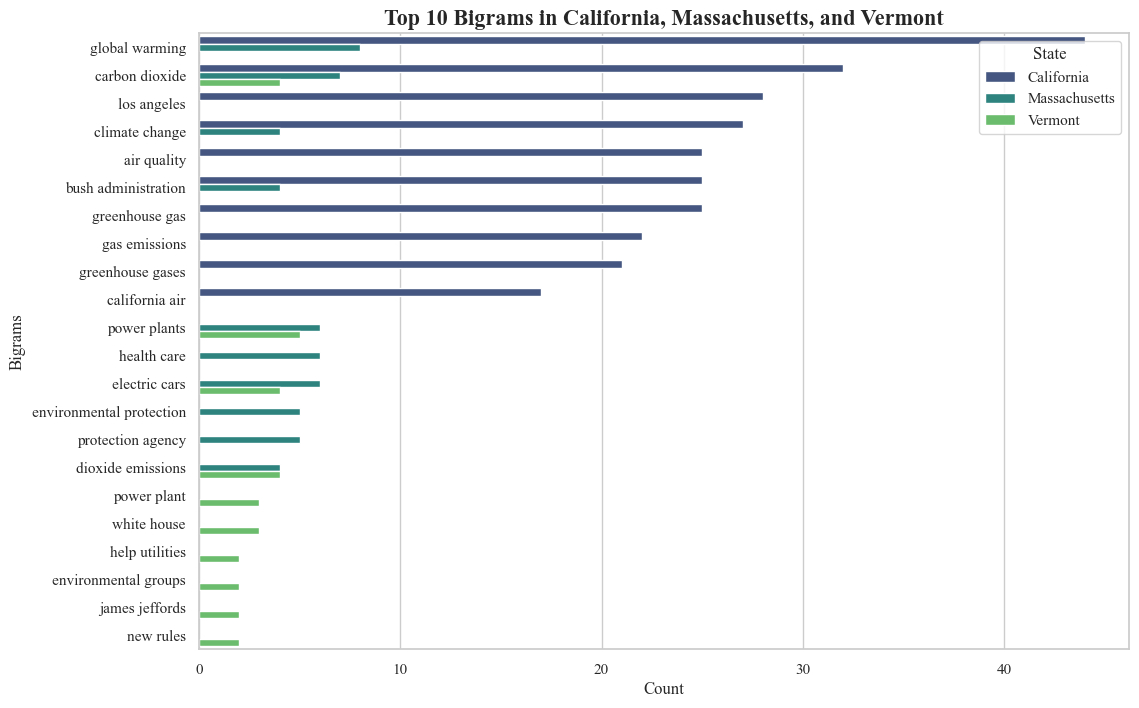

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 bigrams for California, Massachusetts, and Vermont
california_top_bigrams = top_bigrams_states['California'].head(10)
massachusetts_top_bigrams = top_bigrams_states['Massachusetts'].head(10)
vermont_top_bigrams = top_bigrams_states['Vermont'].head(10)

# Combine the data for all three states
combined_data = pd.concat([california_top_bigrams.assign(State='California'),
                           massachusetts_top_bigrams.assign(State='Massachusetts'),
                           vermont_top_bigrams.assign(State='Vermont')
                          ])

# Set a similar style as Massachusetts
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', hue='State', data=combined_data, palette="viridis", dodge=True)

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in California, Massachusetts, and Vermont', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)
plt.savefig('low3.png', bbox_inches='tight')

# Show the plot
plt.show()


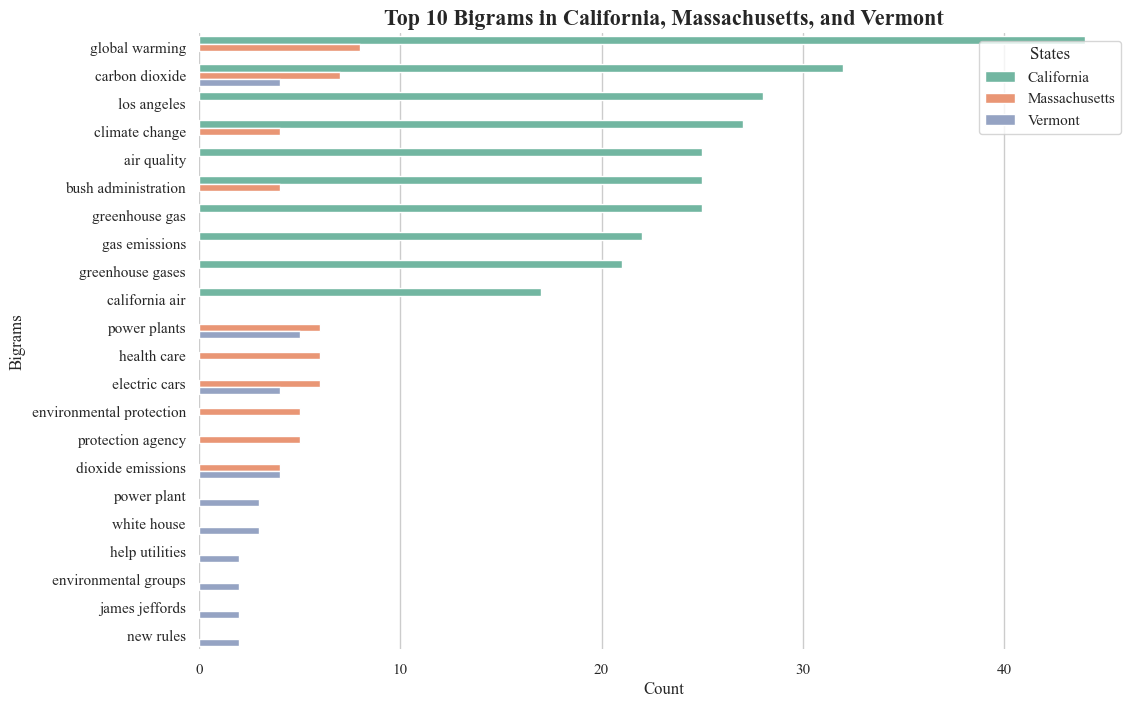

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 bigrams for California, Massachusetts, and Vermont
california_top_bigrams = top_bigrams_states['California'].head(10)
massachusetts_top_bigrams = top_bigrams_states['Massachusetts'].head(10)
vermont_top_bigrams = top_bigrams_states['Vermont'].head(10)

# Combine the data for all three states
combined_data = pd.concat([california_top_bigrams.assign(State='California'),
                           massachusetts_top_bigrams.assign(State='Massachusetts'),
                           vermont_top_bigrams.assign(State='Vermont')])

# Set a custom style
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a custom color palette
custom_palette = sns.color_palette("Set2", n_colors=3)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', hue='State', data=combined_data, palette=custom_palette, dodge=True)

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in California, Massachusetts, and Vermont', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Customize legend placement
bar_plot.legend(title='States', title_fontsize='12', loc='upper right')

# Customize grid style
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 10 bigrams for Massachusetts
massachusetts_top_bigrams = top_bigrams_states['Massachusetts'].head(10)

# Set a different style for the plot
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=massachusetts_top_bigrams, palette="magma")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Massachusetts', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Show the plot
plt.show()


In [117]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# List of the specific states
states = ['Utah', 'Virginia', 'Tennessee', 'Pennsylvania', 'Colorado', 'Arizona',  'Iowa', 'California', 'Montana', 'Wyoming', 'Vermont','Massachusetts']

# Dictionary to hold the top bigrams for each state
top_bigrams_states = {}

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert sums to get the same length for further analysis
    bi_gram_sums = np.array(state_text_bi.sum(axis=0)).flatten()
    
    # Get the feature names (bi-grams)
    bi_gram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame from the bi-gram names and their sums
    bi_gram_freq_df = pd.DataFrame({'bi_gram': bi_gram_names, 'count': bi_gram_sums})
    
    # Sort the DataFrame by count in descending order
    bi_gram_freq_df_sorted = bi_gram_freq_df.sort_values(by='count', ascending=False)
    
    # Store the top 20 bi-grams for the current state
    top_bigrams_states[state] = bi_gram_freq_df_sorted.head(20)

# Compute cosine similarity between states based on top 20 bigrams
similarity_matrix = np.zeros((len(states), len(states)))

for i, state1 in enumerate(states):
    for j, state2 in enumerate(states):
        # Extract the top 20 bigrams for each state
        bigrams_state1 = set(top_bigrams_states[state1]['bi_gram'])
        bigrams_state2 = set(top_bigrams_states[state2]['bi_gram'])
        
        # Calculate Jaccard similarity (intersection over union) between bigram sets
        intersection_size = len(bigrams_state1.intersection(bigrams_state2))
        union_size = len(bigrams_state1.union(bigrams_state2))
        
        # Calculate cosine similarity using Jaccard similarity
        similarity = intersection_size / union_size if union_size != 0 else 0
        similarity_matrix[i, j] = similarity

# Display the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=states, columns=states)
print(similarity_df)


                   Utah  Virginia  Tennessee  Pennsylvania  Colorado  \
Utah           1.000000  0.000000   0.000000      0.052632  0.081081   
Virginia       0.000000  1.000000   0.081081      0.290323  0.000000   
Tennessee      0.000000  0.081081   1.000000      0.111111  0.000000   
Pennsylvania   0.052632  0.290323   0.111111      1.000000  0.025641   
Colorado       0.081081  0.000000   0.000000      0.025641  1.000000   
Arizona        0.025641  0.025641   0.025641      0.025641  0.025641   
Iowa           0.000000  0.052632   0.025641      0.052632  0.000000   
California     0.000000  0.052632   0.025641      0.052632  0.052632   
Montana        0.025641  0.000000   0.000000      0.000000  0.025641   
Wyoming        0.111111  0.052632   0.025641      0.111111  0.081081   
Vermont        0.025641  0.025641   0.025641      0.025641  0.000000   
Massachusetts  0.052632  0.052632   0.025641      0.111111  0.000000   

                Arizona      Iowa  California   Montana   Wyomi

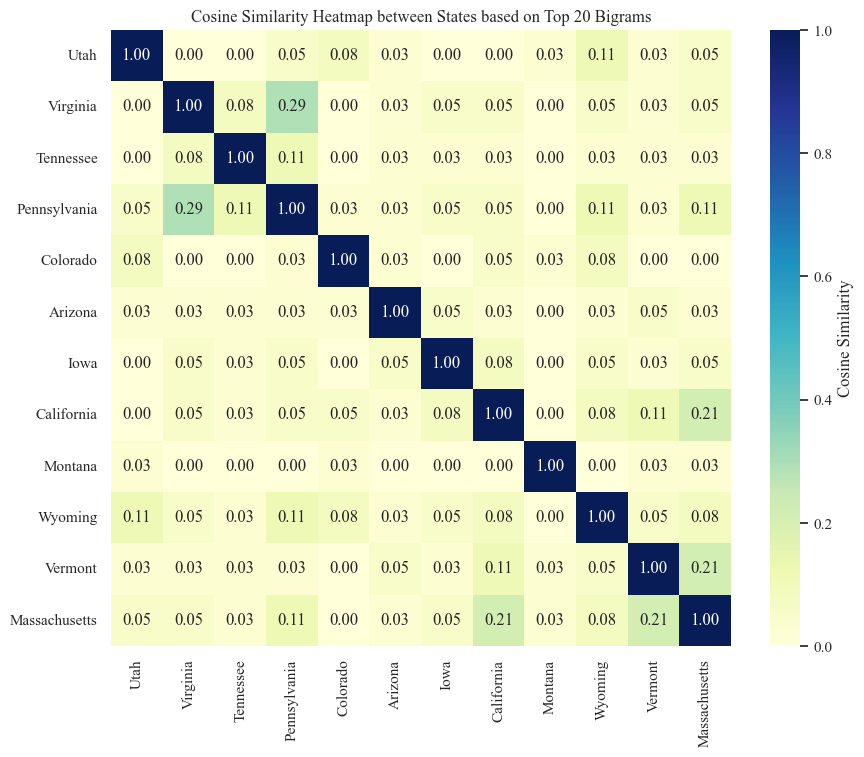

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming similarity_df is the DataFrame containing cosine similarity values
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="YlGnBu", annot=True, fmt=".2f", cbar_kws={'label': 'Cosine Similarity'})
plt.title('Cosine Similarity Heatmap between States based on Top 20 Bigrams')
plt.show()


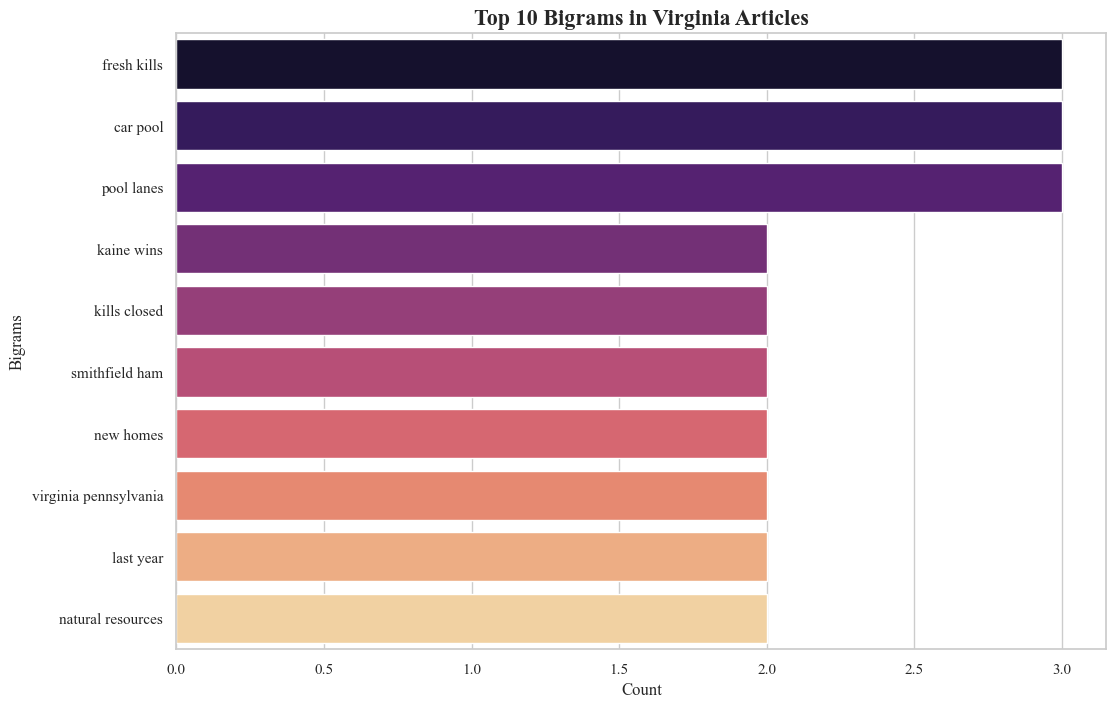

In [96]:
# Get the top 10 bigrams for Massachusetts
virginia_top_bigrams = top_bigrams_states['Virginia'].head(10)

# Set a different style for the plot
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=virginia_top_bigrams, palette="magma")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Virginia Articles', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Show the plot
plt.show()

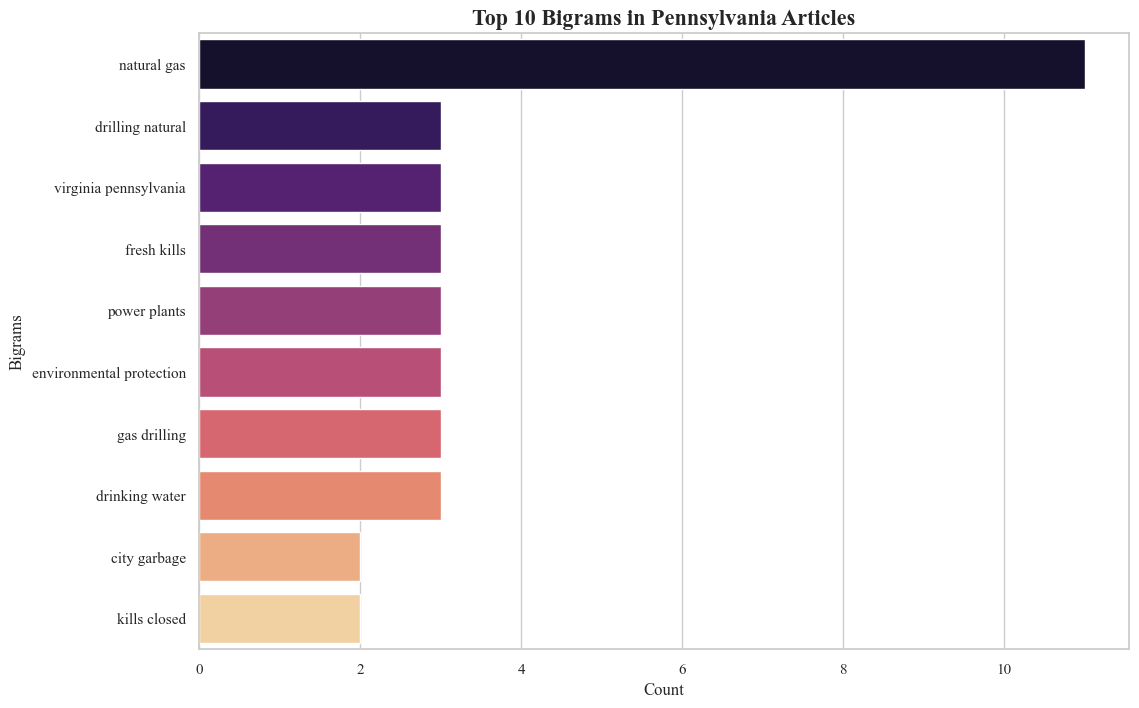

In [98]:
# Get the top 10 bigrams for Massachusetts
penn_top_bigrams = top_bigrams_states['Pennsylvania'].head(10)

# Set a different style for the plot
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=penn_top_bigrams, palette="magma")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Pennsylvania Articles', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Show the plot
plt.show()

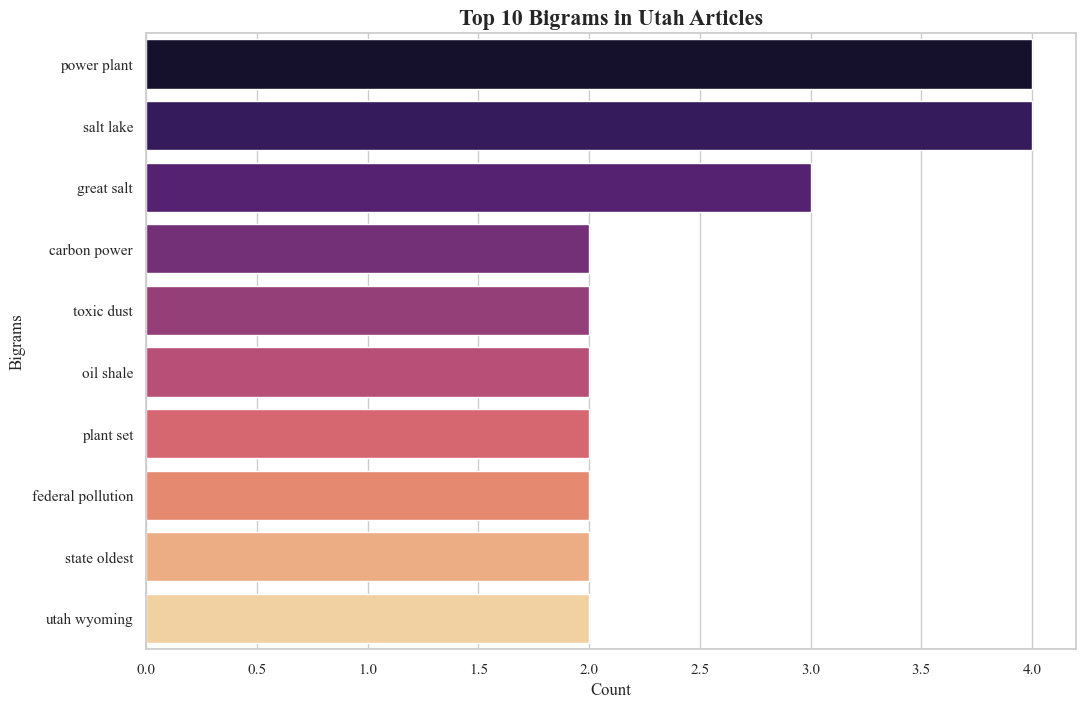

In [99]:
# Get the top 10 bigrams for Massachusetts
utah_top_bigrams = top_bigrams_states['Utah'].head(10)

# Set a different style for the plot
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=utah_top_bigrams, palette="magma")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Utah Articles', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Show the plot
plt.show()

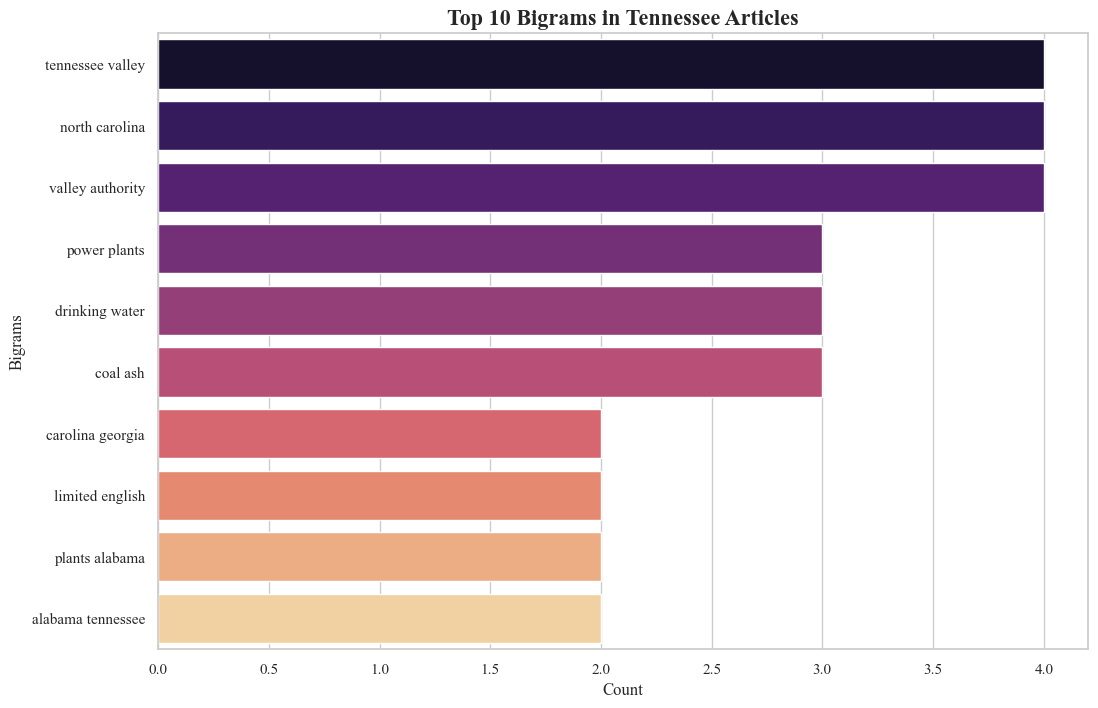

In [100]:
# Get the top 10 bigrams for Massachusetts
tennessee_top_bigrams = top_bigrams_states['Tennessee'].head(10)

# Set a different style for the plot
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=tennessee_top_bigrams, palette="magma")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Tennessee Articles', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Show the plot
plt.show()

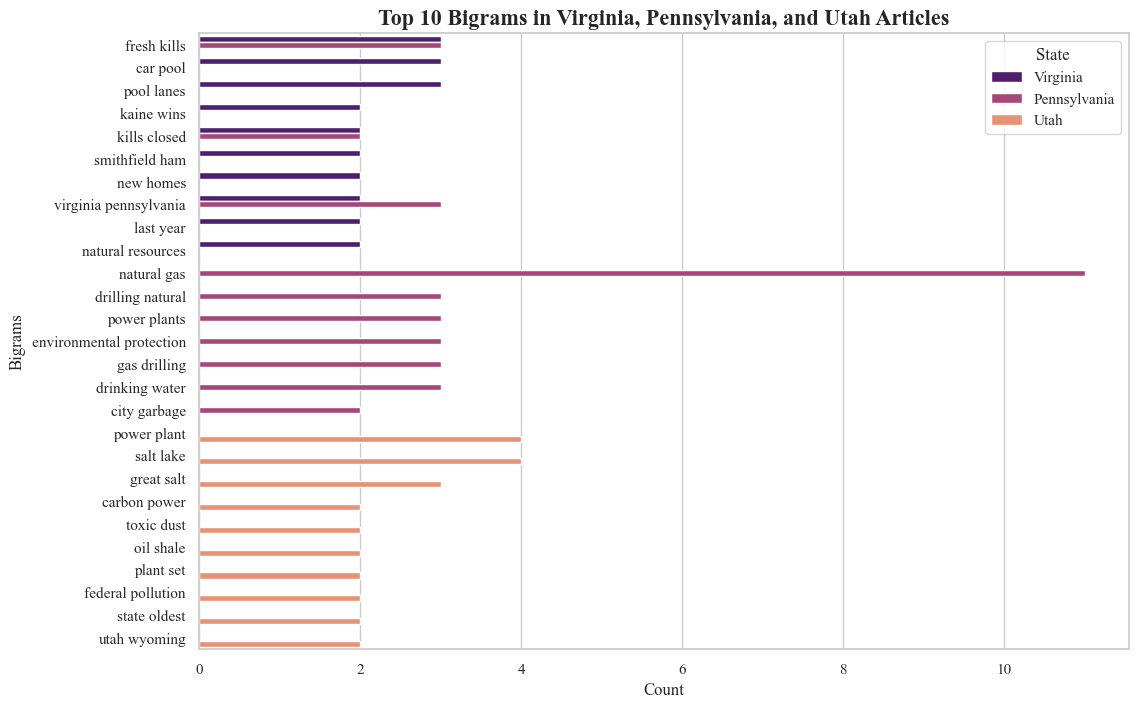

In [103]:
# Get the top 10 bigrams for Pennsylvania and Utah
pennsylvania_top_bigrams = top_bigrams_states['Pennsylvania'].head(10)
utah_top_bigrams = top_bigrams_states['Utah'].head(10)

# Combine the data for all three states (Virginia, Pennsylvania, and Utah)
combined_data = pd.concat([virginia_top_bigrams.assign(State='Virginia'),
                           pennsylvania_top_bigrams.assign(State='Pennsylvania'),
                           utah_top_bigrams.assign(State='Utah')])

# Set the same style as your code
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', hue='State', data=combined_data, palette="magma", dodge=True)

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Virginia, Pennsylvania, and Utah Articles', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)
# Save the plot as an image file (e.g., PNG or PDF)
plt.savefig('high3.png', bbox_inches='tight')

# Show the plot
plt.show()


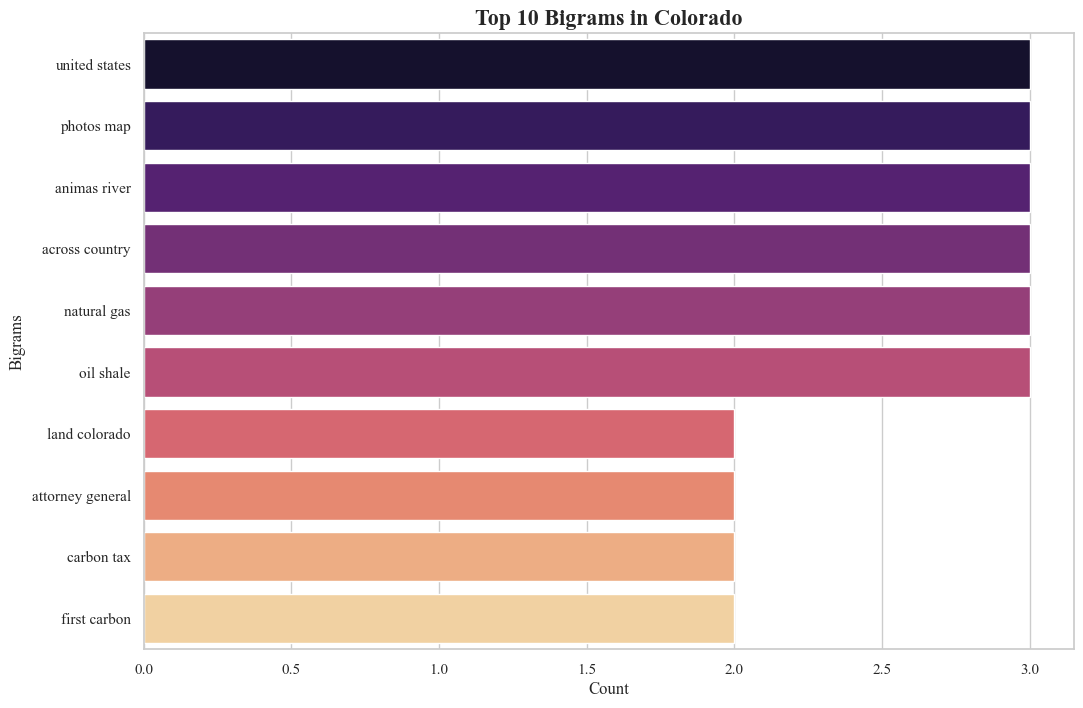

In [101]:
# Get the top 10 bigrams for Massachusetts
colorado_top_bigrams = top_bigrams_states['Colorado'].head(10)

# Set a different style for the plot
sns.set(style="whitegrid", rc={'font.family': 'serif', 'font.serif': 'Times New Roman'})

# Create a bar plot using seaborn
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='count', y='bi_gram', data=colorado_top_bigrams, palette="magma")

# Customize the plot
bar_plot.set_title('Top 10 Bigrams in Colorado', fontweight='bold', fontsize=16)
bar_plot.set_xlabel('Count', fontsize=12)
bar_plot.set_ylabel('Bigrams', fontsize=12)

# Show the plot
plt.show()

<Figure size 1200x800 with 0 Axes>

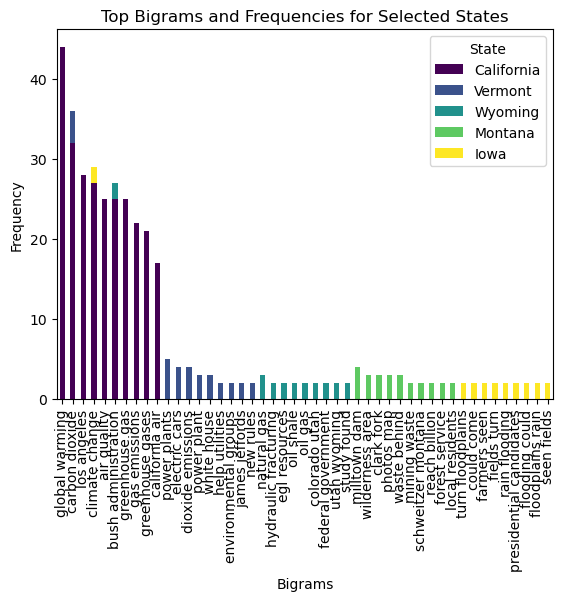

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the specific states
states = ['California', 'Vermont', 'Wyoming', 'Montana', 'Iowa']

# Dictionary to hold the top bigrams for each state
top_bigrams_states = {}

# Number of top bigrams to include
top_n_bigrams = 10

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert sums to get the same length for further analysis
    bi_gram_sums = np.array(state_text_bi.sum(axis=0)).flatten()
    
    # Get the feature names (bi-grams)
    bi_gram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame from the bi-gram names and their sums
    bi_gram_freq_df = pd.DataFrame({'bi_gram': bi_gram_names, 'count': bi_gram_sums})
    
    # Sort the DataFrame by count in descending order
    bi_gram_freq_df_sorted = bi_gram_freq_df.sort_values(by='count', ascending=False)
    
    # Store the top N bi-grams for the current state
    top_bigrams_states[state] = bi_gram_freq_df_sorted.head(top_n_bigrams)

# Create a DataFrame to hold the bigrams and their frequencies
bigrams_df = pd.concat([top_bigrams_states[state].set_index('bi_gram')['count'].rename(state) for state in states], axis=1)

# Create a bar plot for the bigrams
plt.figure(figsize=(12, 8))
bigrams_df.plot(kind='bar', stacked=True, cmap="viridis")
plt.title('Top Bigrams and Frequencies for Selected States')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.legend(title='State')
plt.show()


<Figure size 1600x1000 with 0 Axes>

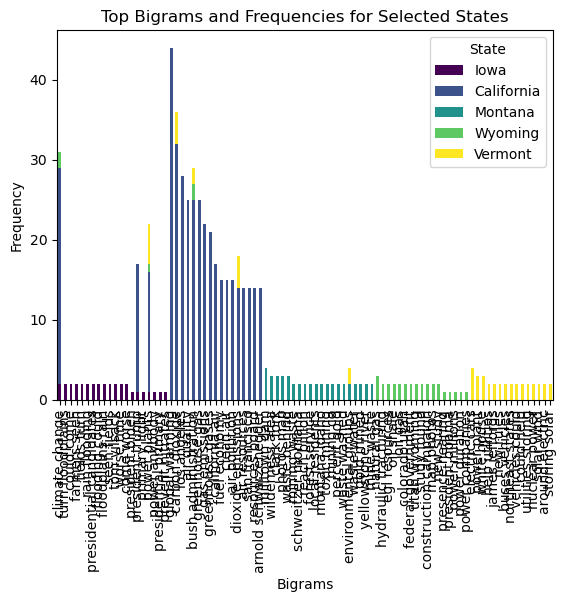

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the specific states
states = ['Iowa', 'California', 'Montana', 'Wyoming', 'Vermont']

# Dictionary to hold the top bigrams for each state
top_bigrams_states = {}

# Number of top bigrams to include
top_n_bigrams = 20

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert sums to get the same length for further analysis
    bi_gram_sums = np.array(state_text_bi.sum(axis=0)).flatten()
    
    # Get the feature names (bi-grams)
    bi_gram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame from the bi-gram names and their sums
    bi_gram_freq_df = pd.DataFrame({'bi_gram': bi_gram_names, 'count': bi_gram_sums})
    
    # Sort the DataFrame by count in descending order
    bi_gram_freq_df_sorted = bi_gram_freq_df.sort_values(by='count', ascending=False)
    
    # Store the top N bi-grams for the current state
    top_bigrams_states[state] = bi_gram_freq_df_sorted.head(top_n_bigrams)

# Create a DataFrame to hold the bigrams and their frequencies
bigrams_df = pd.concat([top_bigrams_states[state].set_index('bi_gram')['count'].rename(state) for state in states], axis=1)

# Create a larger figure size
plt.figure(figsize=(16, 10))

# Create a bar plot for the bigrams
bigrams_df.plot(kind='bar', stacked=True, cmap="viridis")
plt.title('Top Bigrams and Frequencies for Selected States')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.legend(title='State')

# Save the plot as an image
plt.savefig('bigrams_comparison.png', bbox_inches='tight')

# Show the plot
plt.show()


<Figure size 20000x12000 with 0 Axes>

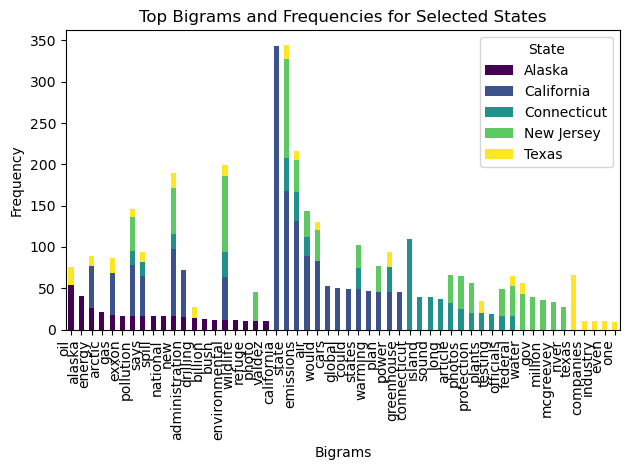

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the specific states
states = ['Alaska', 'California', 'Connecticut', 'New Jersey', 'Texas']

# Dictionary to hold the top bigrams for each state
top_bigrams_states = {}

# Number of top bigrams to include
top_n_bigrams = 20

for state in states:
    # Filter the DataFrame for the current state
    state_data = filter_dta[filter_dta['State'] == state]
    
    # Transforming state-specific text data into a matrix of bi-gram counts
    state_text_bi = vectorizer.fit_transform(state_data['tokens_join'])
    
    # Convert sums to get the same length for further analysis
    bi_gram_sums = np.array(state_text_bi.sum(axis=0)).flatten()
    
    # Get the feature names (bi-grams)
    bi_gram_names = vectorizer.get_feature_names_out()
    
    # Create a DataFrame from the bi-gram names and their sums
    bi_gram_freq_df = pd.DataFrame({'bi_gram': bi_gram_names, 'count': bi_gram_sums})
    
    # Sort the DataFrame by count in descending order
    bi_gram_freq_df_sorted = bi_gram_freq_df.sort_values(by='count', ascending=False)
    
    # Store the top N bi-grams for the current state
    top_bigrams_states[state] = bi_gram_freq_df_sorted.head(top_n_bigrams)

# Create a DataFrame to hold the bigrams and their frequencies
bigrams_df = pd.concat([top_bigrams_states[state].set_index('bi_gram')['count'].rename(state) for state in states], axis=1)

# Create a larger figure size with more space between x-axis labels
plt.figure(figsize=(200, 120))

# Create a bar plot for the bigrams
bigrams_df.plot(kind='bar', stacked=True, cmap="viridis")
plt.title('Top Bigrams and Frequencies for Selected States')
plt.xlabel('Bigrams')
plt.ylabel('Frequency')
plt.legend(title='State')

# Increase space between x-axis labels
plt.xticks(rotation=90, ha='right')

# Save the plot as an image
plt.tight_layout()
plt.savefig('bigrams_comparison_1.png', bbox_inches='tight')

# Show the plot
plt.show()


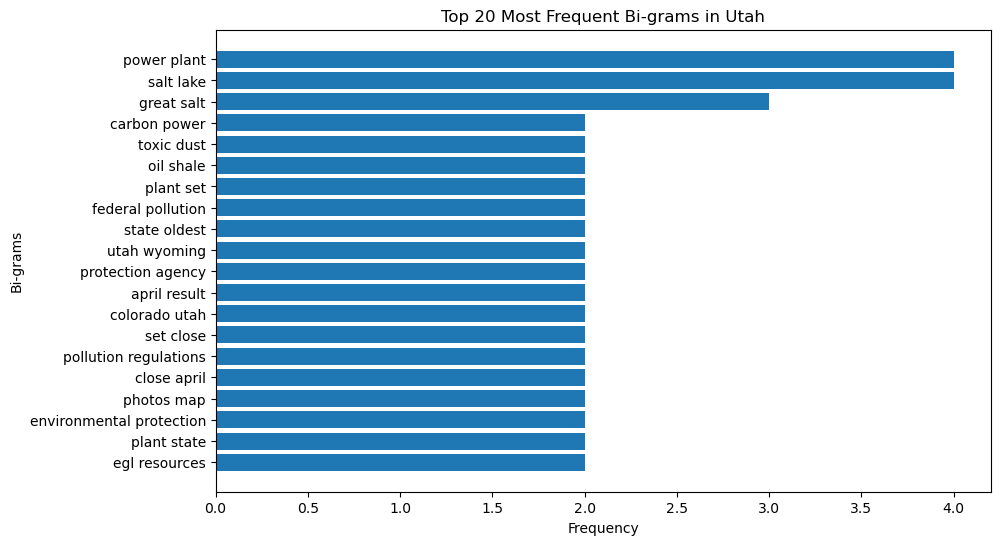

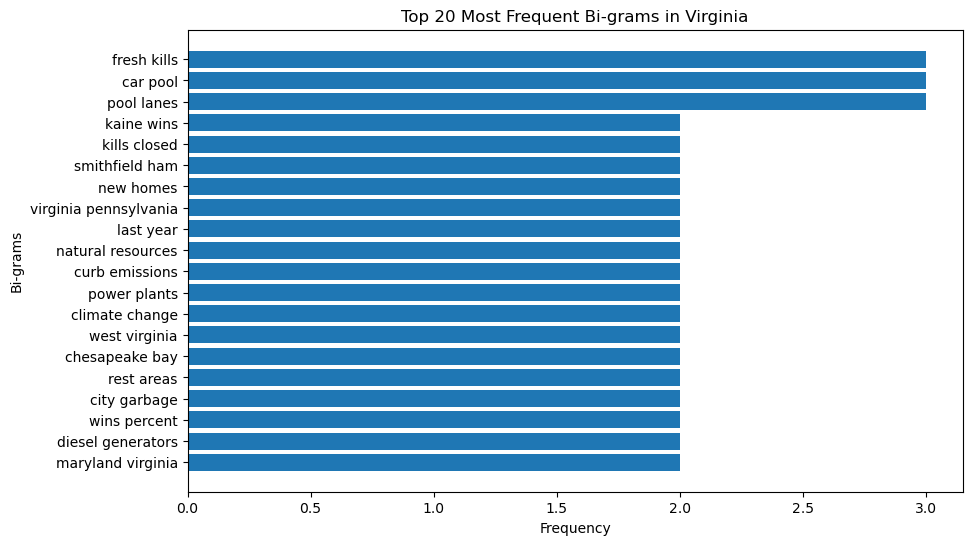

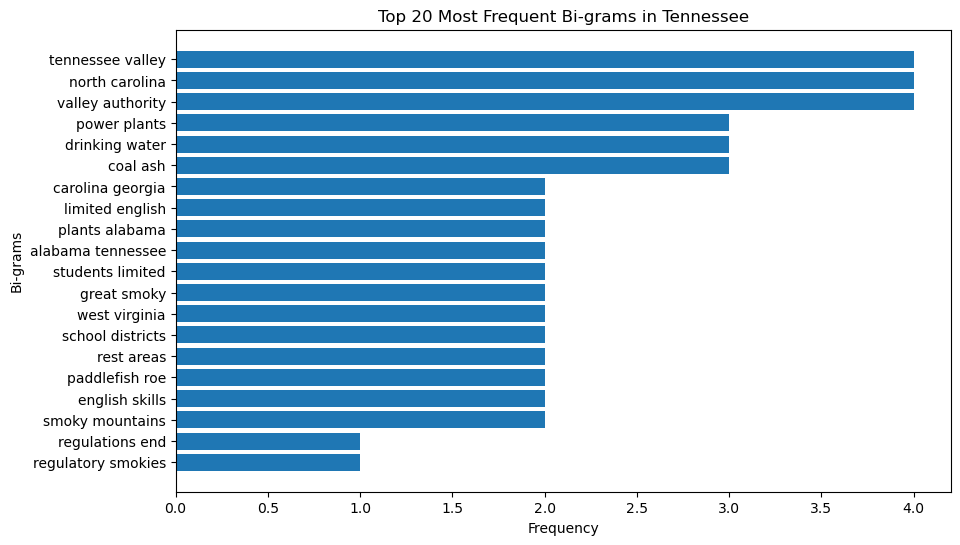

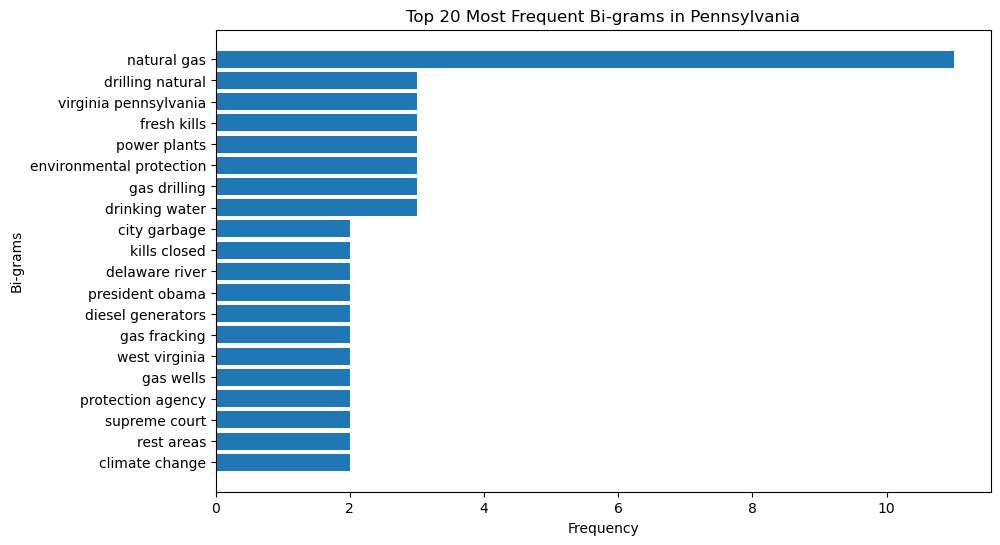

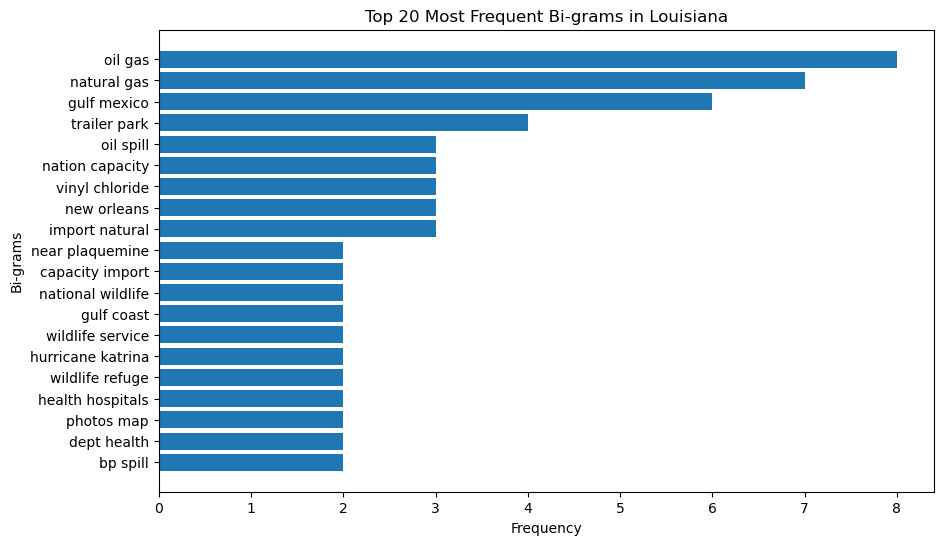

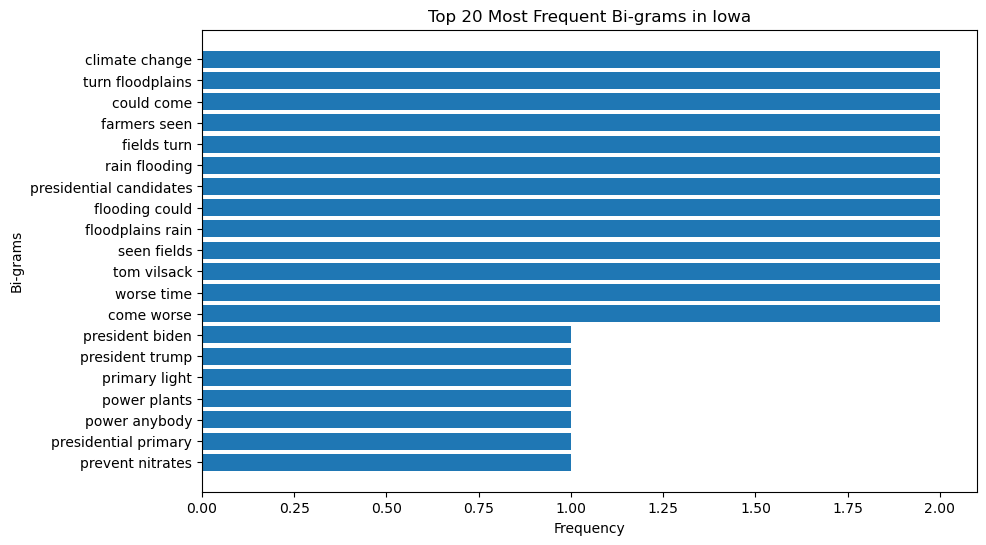

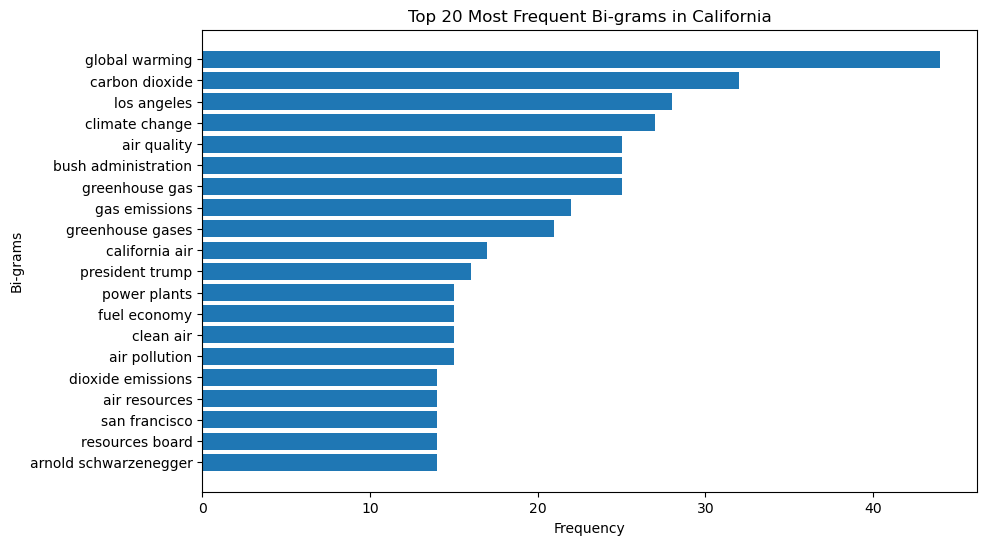

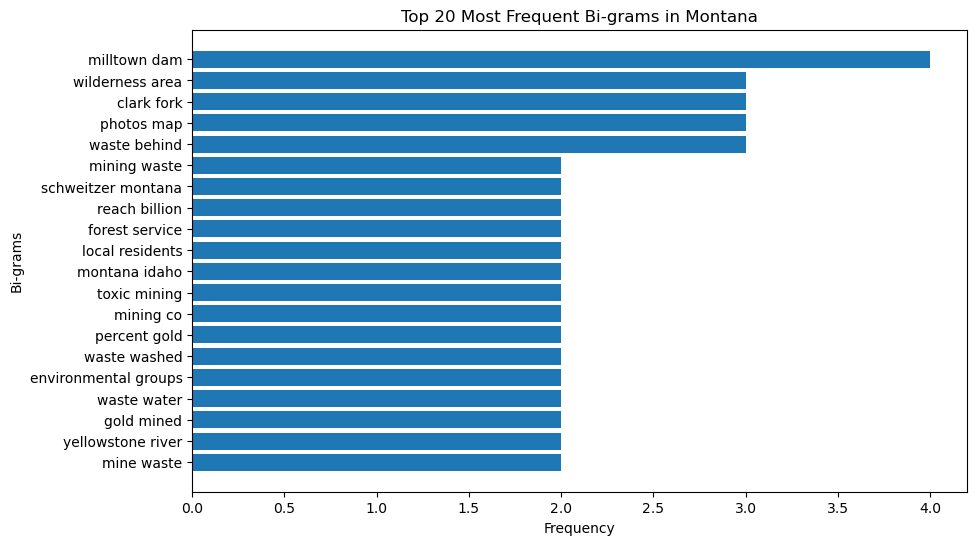

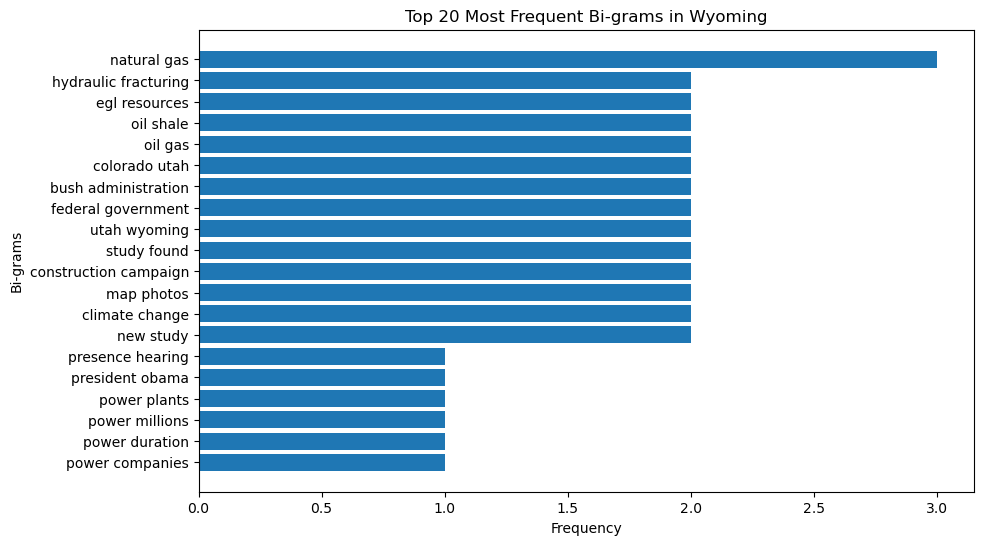

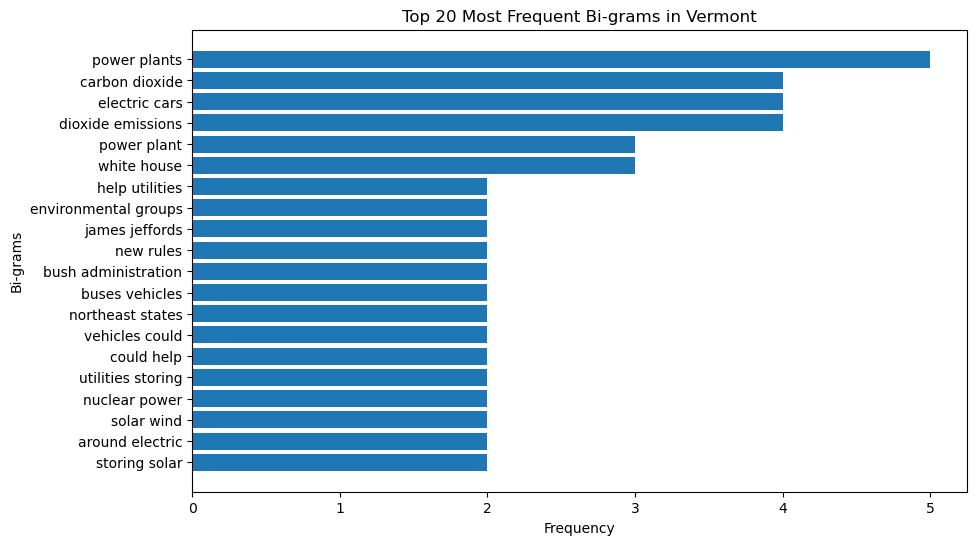

In [15]:
import matplotlib.pyplot as plt

# Assuming 'top_bigrams_states' is a dictionary with states as keys and top bi-grams DataFrames as values.

for state, top_bi_grams_df in top_bigrams_states.items():
    bi_grams = top_bi_grams_df['bi_gram']
    counts = top_bi_grams_df['count']

    plt.figure(figsize=(10, 6))
    plt.barh(bi_grams, counts)
    plt.xlabel('Frequency')
    plt.ylabel('Bi-grams')
    plt.title(f'Top 20 Most Frequent Bi-grams in {state}')
    plt.gca().invert_yaxis()  # To display the highest frequency at the top
    plt.show()
